In [58]:
!pip install librosa


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!dir

 Volume in drive C is ABHI
 Volume Serial Number is 9257-4F16

 Directory of C:\Users\DELL\Deep Learning Playlist\Sound Analysis EDA

14-05-2024  22:53    <DIR>          .
14-05-2024  15:03    <DIR>          ..
14-05-2024  16:22    <DIR>          .ipynb_checkpoints
20-05-2014  00:32            49,436 chirp.wav
14-05-2024  22:53           322,073 Sound_Analysis_EDA.ipynb
14-05-2024  20:51    <DIR>          UrbanSound8K
20-05-2014  00:45           494,104 UrbanSound8K.csv
14-05-2024  14:36     6,023,741,708 UrbanSound8K.tar.gz
               4 File(s)  6,024,607,321 bytes
               4 Dir(s)  51,809,619,968 bytes free


In [4]:
filename = "chirp.wav"

In [5]:
import IPython.display as ipd

In [6]:
import librosa
import librosa.display

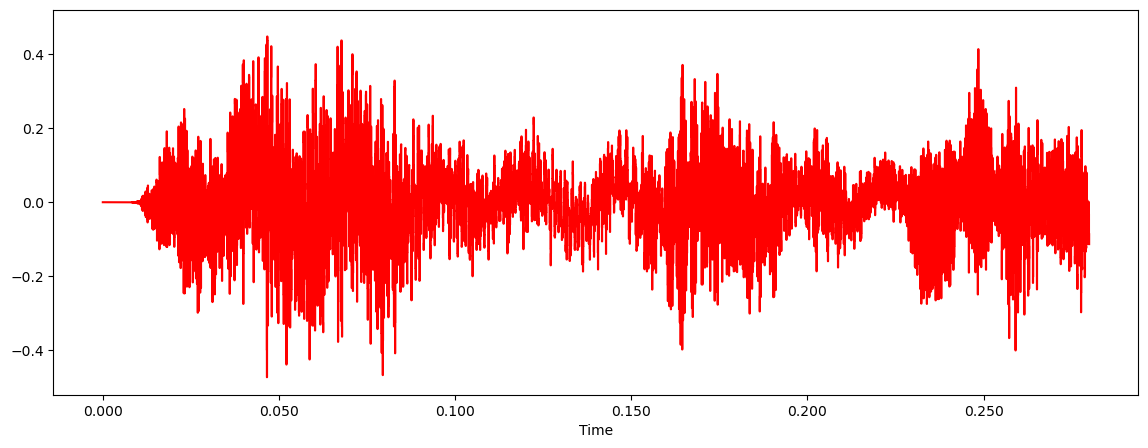

In [7]:
#chirp sound
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate, color="red")
ipd.Audio(filename)

In [8]:
sample_rate

22050

In [9]:
# sample rate defines how many times per second a sound is sampled


In [10]:
from scipy.io import wavfile as wav
wave_sample_rate,scipy_audio = wav.read(filename)

In [11]:
wave_sample_rate

44100

In [12]:
import pandas as pd
#we have the csv file containing metadata

metadata = pd.read_csv("UrbanSound8K.csv")

In [13]:
metadata.head()
#this csv file cpco

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


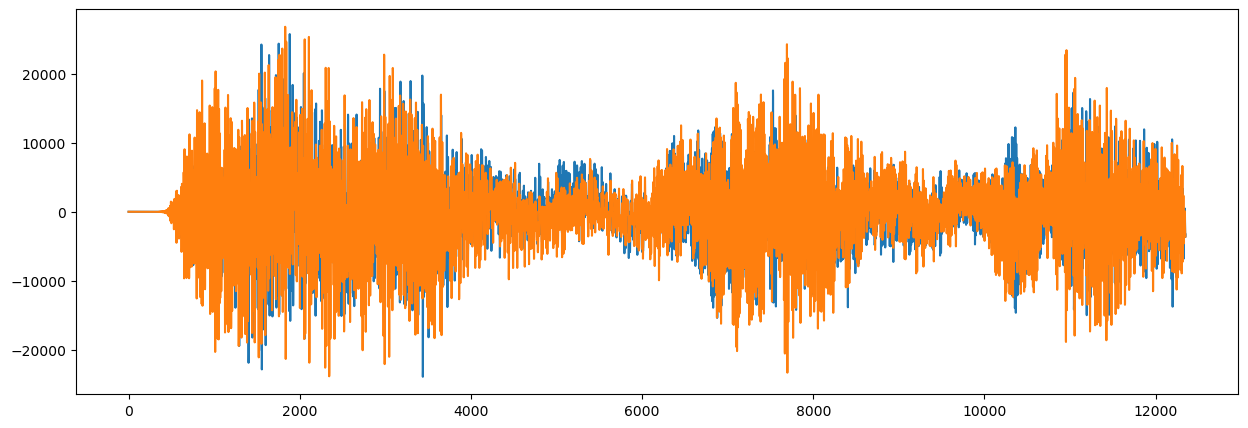

In [14]:
plt.figure(figsize=(15,5))
plt.plot(scipy_audio)

In [15]:
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate,n_mfcc = 40)
print(mfccs.shape)

(40, 13)


In [16]:
mfccs

array([[-2.59456848e+02, -1.43480179e+02, -9.77050323e+01,
        -8.78411942e+01, -1.04981995e+02, -1.27920097e+02,
        -1.28247513e+02, -1.25512619e+02, -1.32782822e+02,
        -1.51421890e+02, -1.54786362e+02, -1.31297531e+02,
        -1.44689209e+02],
       [-1.20550079e+01, -2.06273985e+00,  1.46859875e+01,
         3.50782738e+01,  5.35959320e+01,  6.15849380e+01,
         5.88338623e+01,  3.23234596e+01,  9.95318985e+00,
         9.52701092e+00,  9.24252510e+00,  3.53292012e+00,
         5.60966778e+00],
       [ 1.52711391e+01,  1.09967041e+00, -1.63742390e+01,
        -3.76550140e+01, -4.84380150e+01, -3.81879730e+01,
        -1.96962051e+01, -1.76294193e+01, -2.34345303e+01,
        -2.10707874e+01, -2.40439034e+01, -3.27840805e+01,
        -2.69857597e+01],
       [ 8.81578293e+01,  8.08943024e+01,  7.55463715e+01,
         7.26776123e+01,  5.97029190e+01,  4.74252396e+01,
         5.09152527e+01,  6.58544769e+01,  8.13030930e+01,
         7.29674835e+01,  6.83005066e

In [17]:
import os

In [18]:
audio_path = 'C:/Users/DELL/Deep Learning Playlist/Sound Analysis EDA/UrbanSound8K/UrbanSound8K/audio/'


In [19]:
import librosa
import numpy as np

def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features


In [20]:
!pip install resampy

In [21]:


import resampy

In [22]:
pip install --upgrade librosa


  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.1 kB ? eta -:--:--
   - ---

In [23]:
from tqdm import tqdm

extracted_features = []

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_path), 'fold'+str(row["fold"])+'/',str(row['slice_file_name']))
    final_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_labels])

3554it [03:37, 14.81it/s]C:\Users\DELL\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [08:46, 20.24it/s]C:\Users\DELL\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:10, 15.86it/s]


In [24]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [25]:
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
#splitting the dataset into indep and dep 

In [26]:
x.shape

(8732, 40)

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [28]:
y = to_categorical(label.fit_transform(y))

In [29]:
y.shape

(8732, 10)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_train.shape

(6985, 40)

In [32]:
y_train.shape

(6985, 10)

In [33]:
x_test.shape

(1747, 40)

In [34]:
y_test.shape

(1747, 10)

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
#num of classes
num_labels = y.shape[1]

In [38]:
model1 = Sequential()
model1.add(Dense(100, input_shape=(40,))) # as we have 40 features
model1.add(Activation('relu'))
model1.add(Dropout(0.5)) 

model1.add(Dense(200))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_labels))
model1.add(Activation('softmax'))
          
          

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model1.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',verbose=1,save_best_only=True)
start = datetime.now()

model1.fit(x_train,y_train,batch_size = num_batch_size,epochs = num_epochs)

duration = datetime.now() - start
print("training completed in time:",duration)


Epoch 1/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6331 - loss: 1.3666
Epoch 2/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6315 - loss: 1.5100
Epoch 3/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6526 - loss: 1.2413
Epoch 4/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6186 - loss: 1.3417
Epoch 5/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6434 - loss: 1.6593
Epoch 6/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6134 - loss: 1.5068
Epoch 7/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6280 - loss: 1.5138
Epoch 8/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6354 - loss: 1.4012
Epoch 9/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6229 - loss: 1.5680
Epoch 10/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 1.3959
Epoch 11/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6360 - loss: 1.4154
Epoch 12/150
219/219 ━━━━━━━━━━━━━━━━━━━━

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6227 - loss: 1.4398
Epoch 135/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 1.4911
Epoch 136/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 1.7323
Epoch 137/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 1.7467
Epoch 138/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 1.6713
Epoch 139/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - loss: 1.3694
Epoch 140/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6301 - loss: 1.5537
Epoch 141/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - loss: 1.3693
Epoch 142/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6081 - loss: 1.7687
Epoch 143/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 1.6174
Epoch 144/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6326 - loss: 1.4298
Epoch 145/150
219/219 ━━━━━━━━━━━━━

In [51]:
test_accuracy = model1.evaluate(x_test,y_test,verbose = 0)
print(test_accuracy[1])

0.6863194108009338


In [52]:
file_name = "chirp.wav"
prediction_features = feature_extractor(file_name)
prediction_features = prediction_features.reshape(1,-1)

In [53]:
prediction_features.shape

(1, 40)

In [54]:
np.argmax(model1.predict(prediction_features), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([6], dtype=int64)

In [55]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [56]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [64]:
filename = "horn.wav"
audio,sample_rate = librosa.load(filename,res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_label = model1.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis=1)
print(predicted_label)

prediction_class = label.inverse_transform(predicted_label)
prediction_class


[-102.88505      87.88046     -28.997932     16.018015      1.2033685
   16.61361     -13.97893      17.469177     -5.9888306    14.429838
  -17.82136       3.3612053   -11.023228     14.444955      5.394709
   30.56515       5.5551586    13.035866     -6.269046      7.8246927
   -9.91783      11.382299    -12.103567      2.8155384    -2.8936203
    6.367891    -11.633807      7.238143     12.592639      6.793665
  -14.943716      0.10874663   13.804669     17.925474     -6.5646725
    3.734997      4.711442    -18.016933    -19.927254     13.628063  ]
[[-102.88505      87.88046     -28.997932     16.018015      1.2033685
    16.61361     -13.97893      17.469177     -5.9888306    14.429838
   -17.82136       3.3612053   -11.023228     14.444955      5.394709
    30.56515       5.5551586    13.035866     -6.269046      7.8246927
    -9.91783      11.382299    -12.103567      2.8155384    -2.8936203
     6.367891    -11.633807      7.238143     12.592639      6.793665
   -14.943716     

array(['car_horn'], dtype='<U16')

In [1]:
def predict_class(file_name):
    prediction_features = feature_extractor(file_name)
    if prediction_features is not None:
        prediction_features = prediction_features.reshape(1, -1)
        predicted_label = model.predict(prediction_features)
        predicted_label = np.argmax(predicted_label, axis=1)
        prediction_class = labelencoder.inverse_transform(predicted_label)
        return prediction_class[0]
    else:
        return "Error extracting features"

In [ ]:
file_name = "horn.wav"
print(f"The predicted class for {file_name} is: {predict_class(file_name)}")